# Aim

Our goal is vehicle price prediction using the open source Auto data set from the UCI machine learning repository. In this data set, we have prices for 205 automobiles, along with other features such as fuel type, engine type,engine size,etc.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge , Lasso
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# About Dataset

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

# Attributes:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

# Loading Data

In [2]:
df = pd.read_csv("imports-85.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.shape

(205, 26)

The dataset csv doesn't have the header. The header information is available at: https://archive.ics.uci.edu/ml/datasets/Automobile

We are adding headers manually as below.

In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Feature Engineering

**We see '?' in the dataframe above which we are replacing with NaN value below**

In [5]:
df=df.replace('?',np.NaN)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Impute Missing values

**Below is the columnwise missing value count.**

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

As we can see from above, here are the 7 columns containing missing values:

"normalized-losses": 41, "num-of-doors": 2, "bore": 4, "stroke" : 4, "horsepower": 2, "peak-rpm": 2, "price": 4

### Categorical Imputation: Replace by mode

"num-of-doors": 2 missing values, replace them with "four".

**Reason: Since 'four' doors is the most frequent value in this column as shown below, it is the most likely value to occur**

In [7]:
df["num-of-doors"].mode()[0] #df["num-of-doors"].value_counts().idxmax() is also fine

'four'

In [8]:
#replace the missing values by the most frequent value
df["num-of-doors"].fillna(df["num-of-doors"].mode()[0], inplace=True)

### Numerical Imputation: Replace by mean

"normalized-losses": 41 missing values, replace them with mean

"stroke": 4 missing values, replace them with mean

"bore": 4 missing values, replace them with mean

"horsepower": 2 missing values, replace them with mean

"peak-rpm": 2 missing values, replace them with mean

In [9]:
#Replace the missing values by mean value of respective columns
df["normalized-losses"].fillna(df["normalized-losses"].astype("float").mean(), inplace=True)

df["bore"].fillna(df["bore"].astype("float").mean(), inplace=True)

df["stroke"].fillna(df["stroke"].astype("float").mean(), inplace = True)

df["peak-rpm"].fillna(df["peak-rpm"].astype("float").mean(), inplace = True)

df['horsepower'].fillna(df['horsepower'].astype("float").mean(), inplace=True)

### Dropping the records

"price": 4 missing values, delete the entire 4 records

**Reason: As price is what we will predict. So records with missing price will no longer be useful for our modeling purpose**

In [10]:
#Drop entire row "price" column is missing
df.dropna(subset=["price"], axis=0, inplace=True)

In [11]:
# reset index as we dropped 2 rows
df.reset_index(drop=True, inplace=True)

In [12]:
# re-checking missing after handling them
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Check data types

In [13]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Numerical variables should have type 'float' or 'int' whereas variables with strings should have type 'object'. So, we convert below columns to proper data types**

In [14]:
df[["bore", "stroke","price","peak-rpm"]] = df[["bore", "stroke","price","peak-rpm"]].astype("float")
df[["normalized-losses","horsepower"]] = df[["normalized-losses","horsepower"]].astype("int")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

Checking if the data has normal distribution or not: 

# Data Visualization

In [16]:
df2 = df[["symboling","normalized-losses","wheel-base", "length","width",
          "height","curb-weight", "engine-size","horsepower","bore","stroke","compression-ratio",
         "peak-rpm","city-mpg","highway-mpg","price"]]

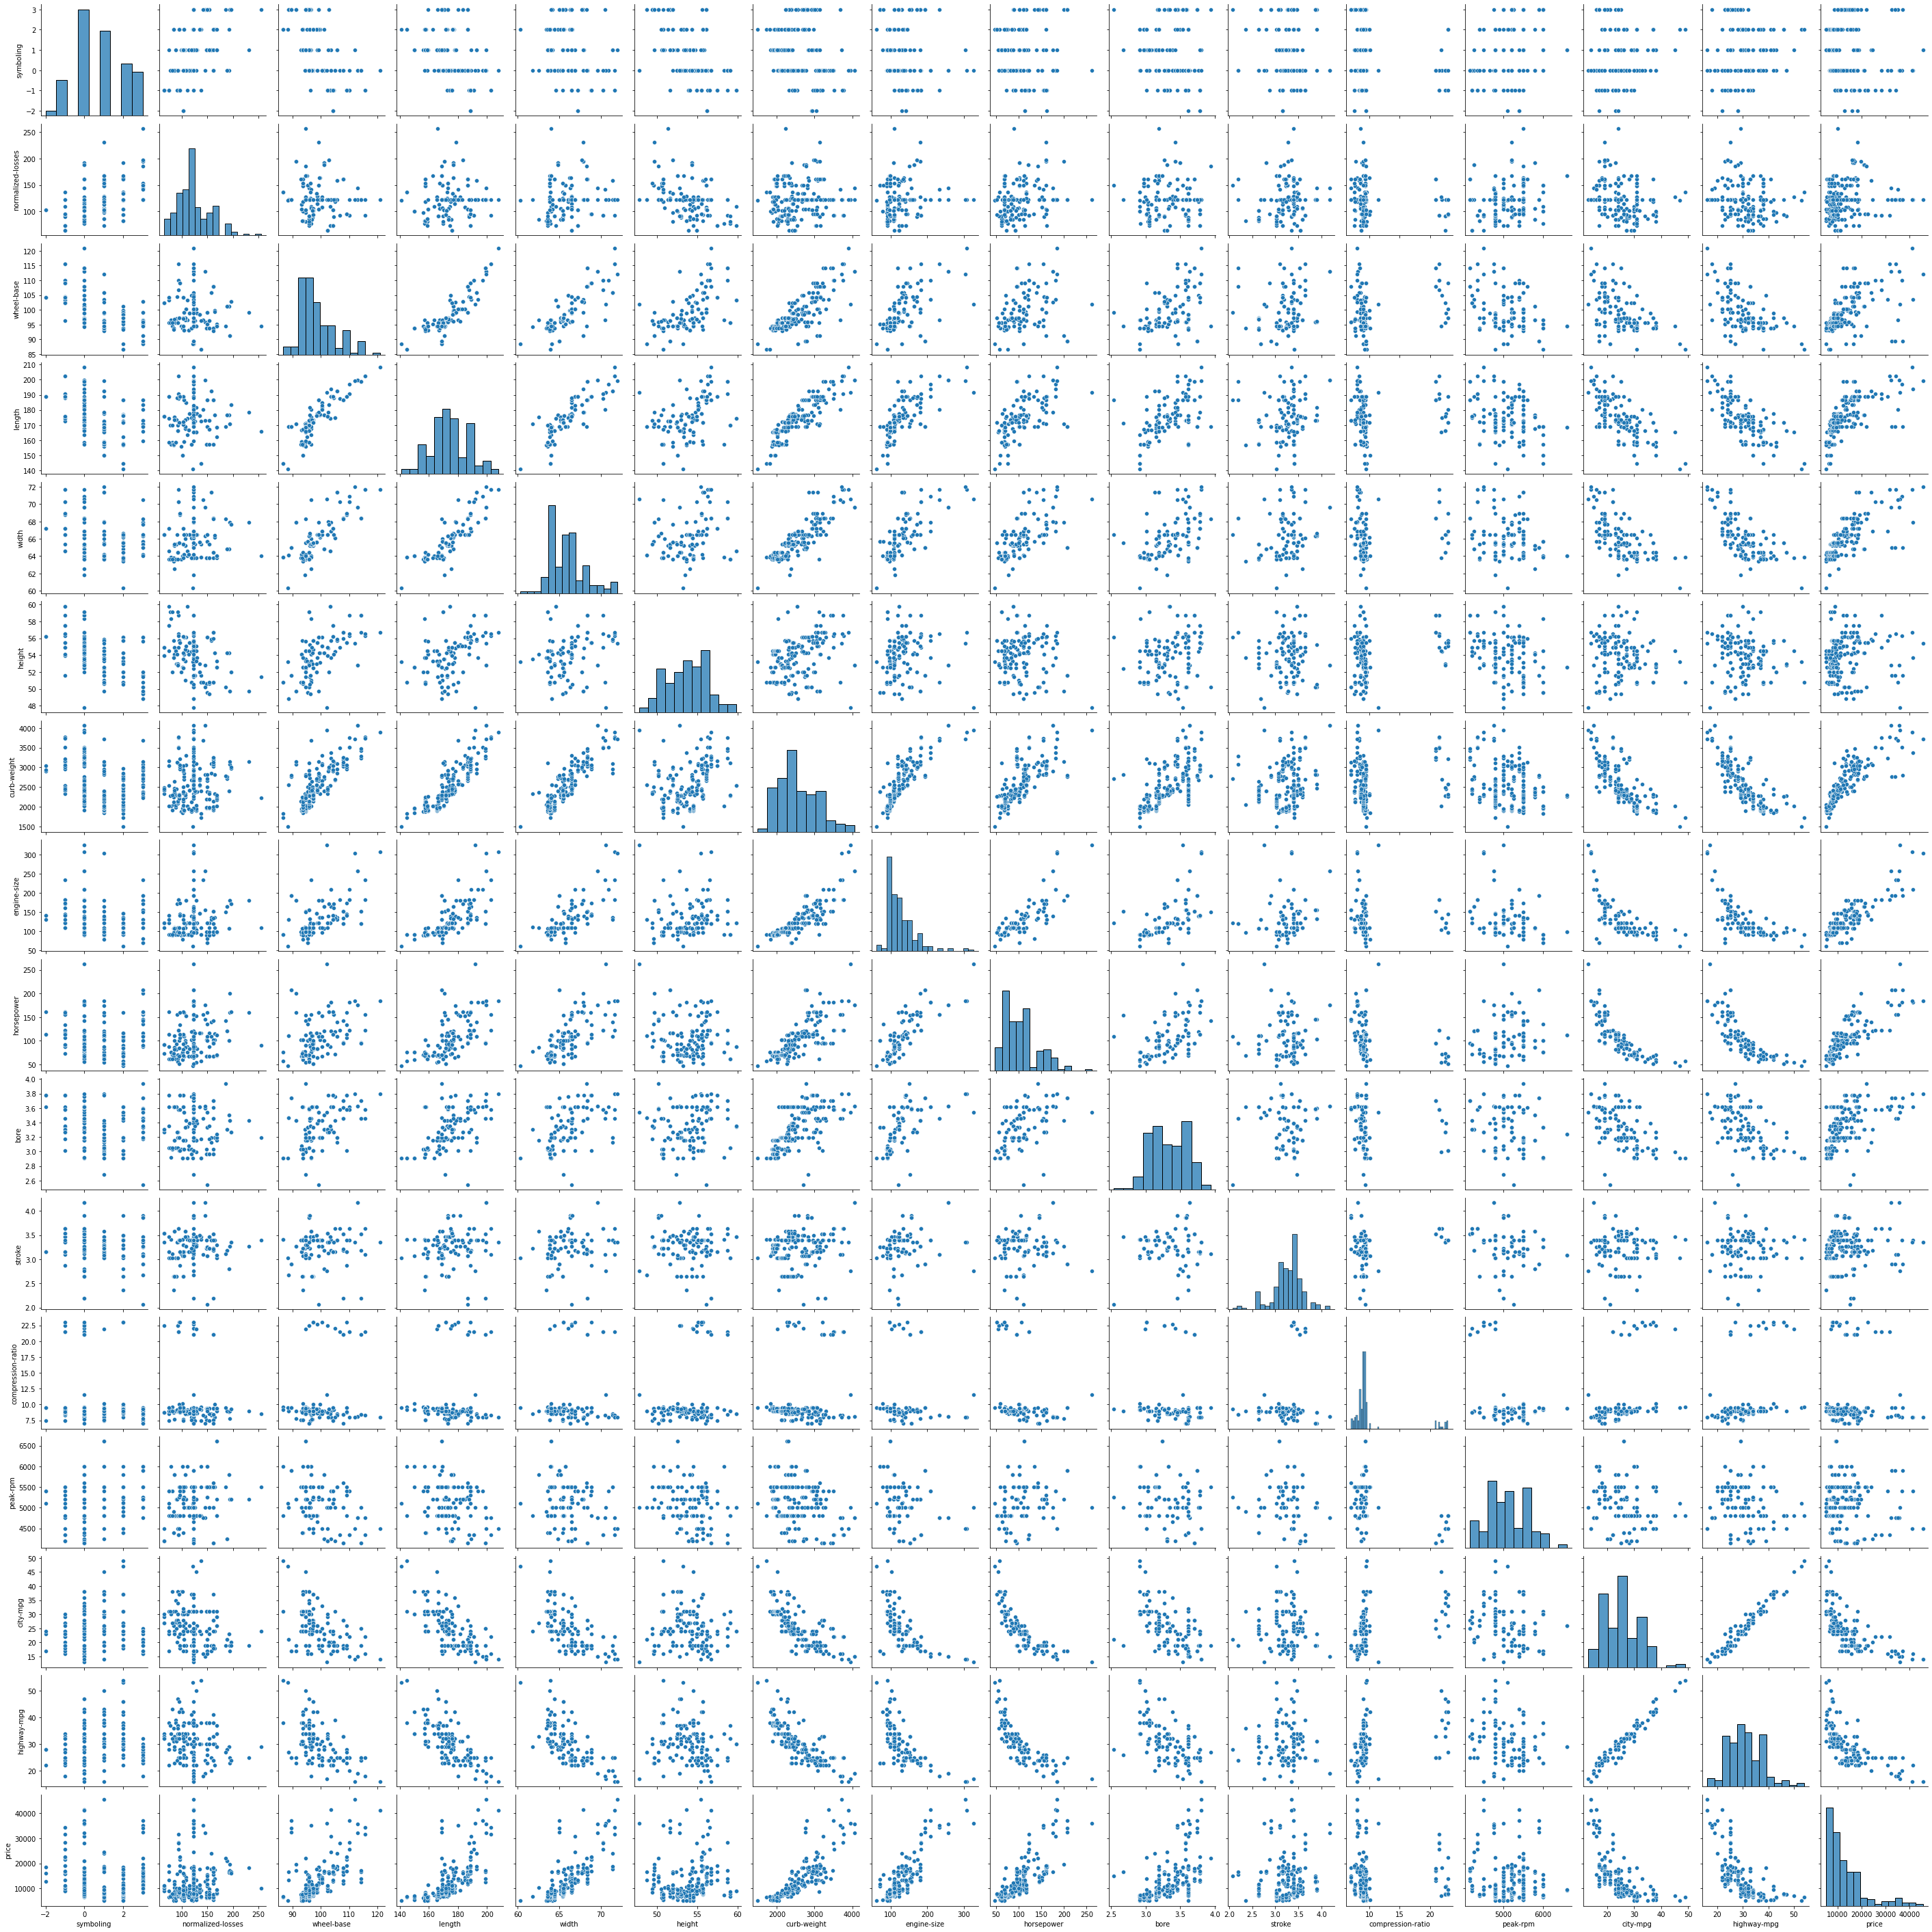

In [17]:
sns.pairplot(df2)

Difficult to understand anything from above due to too many features, so we try to see correlation and plot a heatmap

In [18]:
df2.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,horsepower,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,0.075810,-0.140019,-0.008153,-0.182196,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,0.217300,-0.029862,0.055045,-0.114713,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.371178,0.493244,0.158018,0.250313,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.579795,0.608971,0.123952,0.159733,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.615056,0.544885,0.188822,0.189867,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,-0.087001,0.180449,-0.060663,0.259737,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.757981,0.644060,0.167438,0.156433,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.822668,0.572609,0.205928,0.028889,-0.256733,-0.650546,-0.679571,0.872335
horsepower,0.075810,0.217300,0.371178,0.579795,0.615056,-0.087001,0.757981,0.822668,1.000000,0.566903,0.098128,-0.214489,0.107884,-0.822192,-0.804579,0.809607
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,0.566903,1.000000,-0.055390,0.001263,-0.267392,-0.582027,-0.591309,0.543155


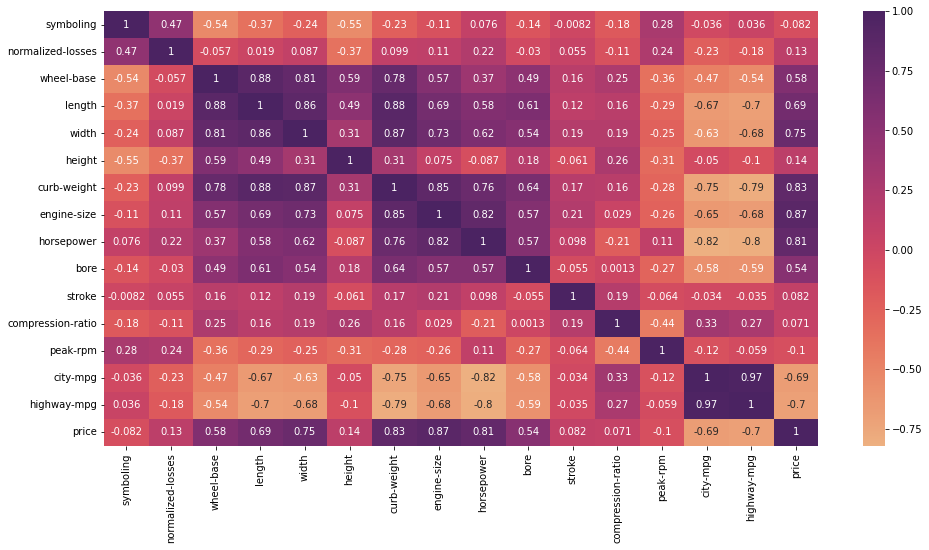

In [19]:
plt.figure(figsize=(16,8))
sns.heatmap(df2.corr(), cmap='flare', annot=True)
plt.show()

we can see from above heatmap that how wheel-base, carlength, width, curb-weight, engine-size, horsepower and bore are highly correlated with price whereas peak-rpm, city-mpg, highway-mpg are negatively correlated with price.

There is also a high correlation among the independent variables which leads to Multicollinearity issue. This may need to be handled.

# Preprocessing

## Feature Scaling

### Normalization

Why normalization?
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

Example

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height"

<b>Target:</b> would like to Normalize those variables so their value ranges from 0 to 1.

<b>Approach: </b>replace original value by (original value)/(maximum value)

<AxesSubplot:ylabel='Density'>

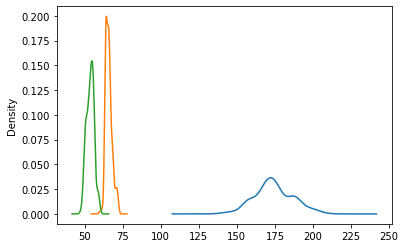

In [20]:
df["length"].plot.kde()
df["width"].plot.kde()
df["height"].plot.kde()

In [21]:
df[["length","width","height"]].head() # these values vary highly w.r.t rest column values

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [22]:
# replace (original value) by (original value)/(maximum value) -> Simple Feature Scaling
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## Binning or Discretization
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>

Text(0.5, 1.0, 'horsepower bins')

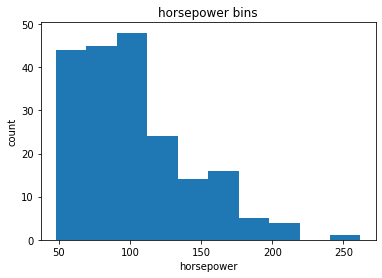

In [23]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated)</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

<b>We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.</b>

In [24]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [25]:
# We set group names:
group_names = ['Low', 'Medium', 'High']

# We apply the function cut that determine what each value of df['horsepower'] belongs to.
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

# Lets see the number of vehicles in each bin
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

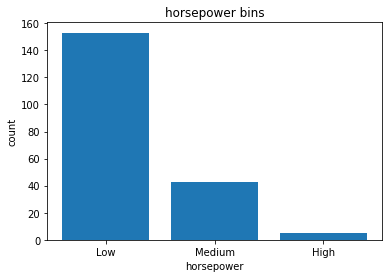

In [26]:
# Lets plot the distribution of each bin.
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High")



Text(0.5, 1.0, 'horsepower bins')

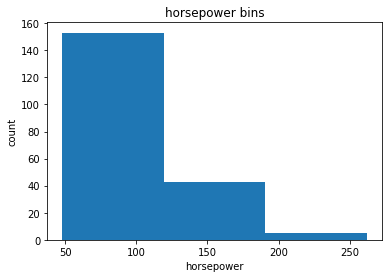

In [27]:
# Bins visualization, Normally, a histogram is used to visualize the distribution of bins we created above.
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

## Categorical Encoding

### One-hot Encoding

<b>What is an Dummy variable?</b>
<p>
    Dummy variable is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use Dummy variables?</b>

<p>
    So we can use categorical variables for regression analysis in the later modules.
</p><br>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

</div>

In [28]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.sample(5)

,diesel,gas
158,0,1
184,0,1
87,1,0
134,0,1
155,1,0


In [29]:
## one-hot-encoder
pd.DataFrame(OneHotEncoder().fit_transform(df[["fuel-type"]]).toarray()).corr()
# this creates a problem of multicollinearity and dummy variable trap

,0,1
0,1.0,-1.0
1,-1.0,1.0


Change column names for clarity, fuel-type-gas value 1 for gas, and 0 for diesel <br>
(When creating dummy variables, a problem that can arise is known as the dummy variable trap. This occurs when we create k dummy variables instead of k-1 dummy variables.
The number of dummy variables we must create is equal to k-1 where k is the number of different values that the categorical variable can take on.)

In [30]:
dummy_variable_1.drop("diesel", axis = 1, inplace=True)
dummy_variable_1.rename(columns={'gas':'fuel-type-gas'}, inplace=True)
print(dummy_variable_1.head(5))

   fuel-type-gas
0              1
1              1
2              1
3              1
4              1


In the dataframe, column fuel-type has a value for 'gas' and 'diesel'as 1s and 0s respectively now

In [31]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
print(df.head())

   symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  bore  \
0  convertible          rwd           front        88.6  0.811148  ...  3.47   
1  convertible          rwd           front        88.6  0.811148  ...  3.47   
2    hatchback          rwd           front        94.5  0.822681  ...  2.68   
3        sedan          fwd           front        99.8  0.848630  ...  3.19   
4        sedan          4wd           front        99.4  0.848630  ...  3.19   

   stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
0    2.68   

**Repeat for `aspiration` column**

In [32]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

Change column names for aspiration, aspiration-turbo value 1 for turbo, and 0 for std

In [33]:
dummy_variable_2.drop("std", axis = 1, inplace=True)
dummy_variable_2.rename(columns={'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2

,aspiration-turbo
0,0
1,0
2,0
3,0
4,0
...,...
196,0
197,1
198,0
199,1


In [34]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)
print(df.head())

   symboling  normalized-losses         make num-of-doors   body-style  \
0          3                122  alfa-romero          two  convertible   
1          3                122  alfa-romero          two  convertible   
2          1                122  alfa-romero          two    hatchback   
3          2                164         audi         four        sedan   
4          2                164         audi         four        sedan   

  drive-wheels engine-location  wheel-base    length     width  ...  stroke  \
0          rwd           front        88.6  0.811148  0.890278  ...    2.68   
1          rwd           front        88.6  0.811148  0.890278  ...    2.68   
2          rwd           front        94.5  0.822681  0.909722  ...    3.47   
3          fwd           front        99.8  0.848630  0.919444  ...    3.40   
4          4wd           front        99.4  0.848630  0.922222  ...    3.40   

   compression-ratio horsepower peak-rpm  city-mpg highway-mpg    price  \
0    

**We can convert `num-of-doors` column also to numerical as the values are numerical type just mentioned as words.**

In [35]:
df["num-of-doors"].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

In [36]:
df["num-of-doors"] = df["num-of-doors"].map({'four':4,'two':2})

In [37]:
df["num-of-doors"].value_counts()

4    115
2     86
Name: num-of-doors, dtype: int64

## Analyzing Individual Feature Patterns using Visualization

<code>How to choose the right visualization method?</code><br>
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.
</div>

In [38]:
# list the data types for each column
print(df.dtypes)

symboling               int64
normalized-losses       int64
make                   object
num-of-doors            int64
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower-binned    category
fuel-type-gas           uint8
aspiration-turbo        uint8
dtype: object


### Continuous numerical variables:

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type <code>int64</code> or <code>float64</code>. A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>
</div>

#### engine-size vs price

correlation between engine-size and price:


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


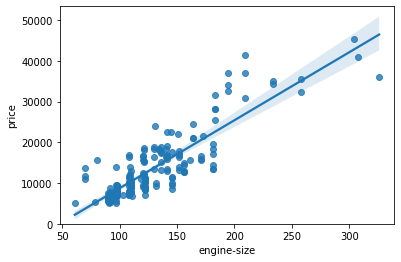

In [39]:
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0,) # y axis starts from zero
print("correlation between engine-size and price:")
df[["engine-size", "price"]].corr()

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.We can examine the correlation between engine-size and price and see it's approximately 0.87

we can calculate the correlation between variables of type int64 or float64 using the method corr: The diagonal elements are always one


#### highway-mpg vs price 

Highway mpg is a potential predictor variable of price
Highway MPG: the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed. City MPG: the score a car will get on average in city conditions, with stopping and starting at lower speeds.



correlation between highway-mpg and price:


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


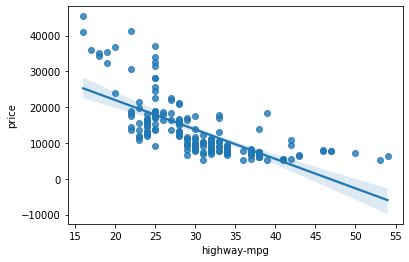

In [40]:
sns.regplot(x = 'highway-mpg', y = 'price',data = df)
print('correlation between highway-mpg and price:')
df[['highway-mpg', 'price']].corr()

As the `highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship` between these two variables. Highway mpg could potentially be a predictor of price.We can examine the correlation between highway-mpg and price and see it's approximately `-0.704`

#### peak-rpm vs price

correlation between peak-rpm and price:


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


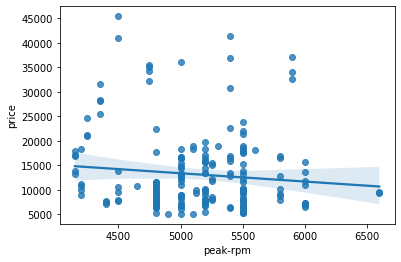

In [41]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
print('correlation between peak-rpm and price:')
df[['peak-rpm','price']].corr()

`Peak rpm does not seem like a good predictor of the price at all` since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.We can examine the `correlation` between peak-rp and price and see it's approximately `-0.101616`

#### stroke vs price

correlation between stroke and prce :


,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


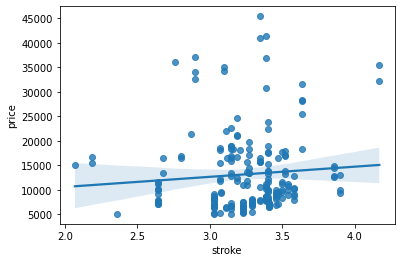

In [42]:
print('correlation between stroke and prce :')

# correlation results between "price" and "stroke" do you expect a linear relationship?
sns.regplot(x = 'stroke', y = 'price', data = df)

# correlation between x="stroke", y="price".
df[['stroke','price']].corr()

`Stroke does not seem like a good predictor of the price at all` since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.We can examine the `correlation` between stroke and price and see it's approximately `0.08`

### Categorical variables
<p>These are variables that describe a <code>characteristic</code> of a data unit, and are selected from a small group of categories. The categorical variables can have the type <code>object</code> or <code>int64</code>. A good way to visualize categorical variables is by using boxplots.
</div>

#### body-style vs price

<AxesSubplot:xlabel='body-style', ylabel='price'>

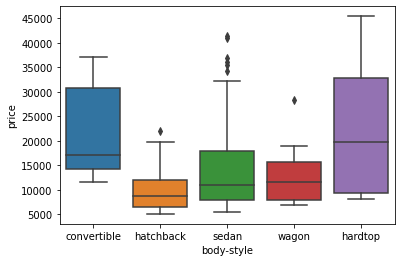

In [43]:
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, 
and so body-style would not be a good predictor of price.



Let's examine if <code>engine-location</code> as a predictor variable of <code>price</code> :

#### engine-location vs price

<AxesSubplot:xlabel='engine-location', ylabel='price'>

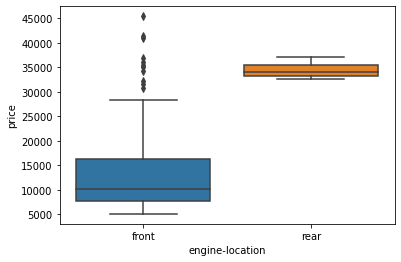

In [44]:
sns.boxplot(x = 'engine-location', y = 'price', data = df)

Here we see that the distribution of price between these two `engine-location` 
categories, front and rear, are distinct enough to take engine-location as a 
`potential good predictor of price`.


Let's examine if <code>drive-wheels</code> as a predictor variable of <code>price</code> :

A `drive wheel` is a wheel of a motor vehicle that transmits force, transforming torque into tractive force from the tires to the road, causing the vehicle to move.

#### drive-wheels vs price

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

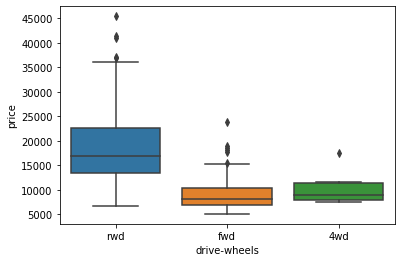

In [45]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

Here we see that the distribution of price between the different drive-wheels categories differs; as such `drive-wheels could potentially be a predictor of price.`

#### horsepower (binned) vs price

<AxesSubplot:xlabel='horsepower-binned', ylabel='price'>

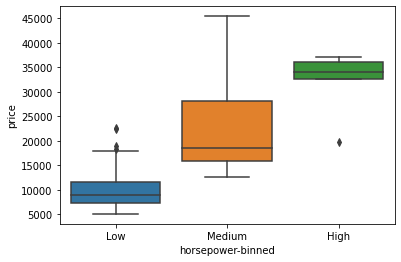

In [46]:
sns.boxplot(x = 'horsepower-binned', y = 'price', data = df)

## Outlier Treatment

In [47]:
# To be done....may be for horse power as its used in modeling
# may be for others also

# Divide data into feature and target

In [48]:
# price is not the last column in df
# also only the numerical columns are taken
X=df[['symboling', 'normalized-losses','num-of-doors',
       'wheel-base', 'length', 'width','height', 'curb-weight', 
       'engine-size','bore', 'stroke', 'compression-ratio','horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg','fuel-type-gas', 'aspiration-turbo']]  # Feature matrix
y=df['price']  # Target vector

In [49]:
X.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type-gas,aspiration-turbo
0,3,122,2,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,1,0
1,3,122,2,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,1,0
2,1,122,2,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,19,26,1,0
3,2,164,4,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,24,30,1,0
4,2,164,4,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,18,22,1,0


In [50]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

# Split the train and test dataset into X and y

In [51]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 18)
(61, 18)
(140,)
(61,)


# Feature Selection

Feature selection yields a subset of features from the original set of features, which are the best representatives of the data.

1. reduces overfitting ‘ The Curse of Dimensionality’ — If your dataset has more features/columns than samples (X), the model will be prone to overfitting. By removing irrelevant data/noise, the model gets to focus on essential features, leading to more generalization.


2. simplifies models — Dimensionality adds many layers to a model, making it needlessly complicated. Overengineering is fun but they may not be better than their simpler counterparts. Simpler models are easier to interpret and debug.


3. reduces training time — Lesser features/dimensions reduces the computation speed, speeding up model training.

## select KBest

It returns the K important features based on mutual information technique or Anova or regression

In [52]:
#select features with k best mutual information technique
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
selector= SelectKBest(mutual_info_regression, k=10)
X_kbest=selector.fit_transform(X,y)
mask = selector.get_support()    

print(selector.scores_)
new_features = X.columns[mask]
print(new_features)   
print(X_kbest.shape)  # k best features

[0.22890872 0.17839879 0.         0.58976245 0.57039122 0.65985739
 0.32820579 0.89789258 0.83582888 0.44808326 0.37049543 0.19942075
 0.84863074 0.17222697 0.7590426  0.8591144  0.03919648 0.09153703]
Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'stroke', 'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')
(201, 10)


In [53]:
#Applying kbest to the training set
selector = SelectKBest(mutual_info_regression, k=10)
X_train_kbest = selector.fit_transform(X_train, y_train)  

#to get names of the selected features
mask = selector.get_support()    
print(selector.scores_)    
new_features = X_train.columns[mask]
print(new_features) 
print(X_train_kbest.shape) 

[0.1879704  0.231473   0.01700656 0.49720542 0.57867896 0.72914873
 0.21535529 1.0321587  0.79089601 0.33950983 0.40032736 0.
 0.74747419 0.25560007 0.69496067 0.74021714 0.05834076 0.11194481]
Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'stroke', 'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')
(140, 10)


**10 selected features are: `'wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','stroke', 'horsepower', 'city-mpg', 'highway-mpg'`**

In [54]:
#select features with k best ANOVA F-Values
from sklearn.feature_selection import f_regression

fvalue_selector = SelectKBest(f_regression, k=10) 
X_train_k_anova = fvalue_selector.fit_transform(X_train, y_train)
print(X_train.shape, X_train_k_anova.shape)
#to get names of the selected features
mask = fvalue_selector.get_support()
new_features1 = X_train.columns[mask]
print(new_features1) 

(140, 18) (140, 10)
Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')


# Checking the Linear Regression Assumptions

# Model Fitting

In [55]:
# Fitting the LR model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Returning the R^2 for the model
r2 = lr_model.score(X, y)
print('R^2: {0}'.format(r2))

R^2: 0.8516117335008295


In [56]:
# Fitting the LR model with 10 selected features (k_best mutual information technique)
lr_model = LinearRegression()
lr_model.fit(X_kbest, y)

# Returning the R^2 for the model
r2 = lr_model.score(X_kbest, y)
print('R^2: {0}'.format(r2))

R^2: 0.8297323613421963


In [57]:
# Fitting the LR model with 10 selected features (k_best anova)
lr_model1 = LinearRegression()
lr_model1.fit(X_train_k_anova, y_train)

# Returning the R^2 for the model
r2 = lr_model1.score(X_train_k_anova, y_train)
print('R^2: {0}'.format(r2))

R^2: 0.8279333797840593


R-Squared Score: means how much of the variation in the target variable that can be explained by the set of features used in training the model. **Higher the Rsquare better is the model**

Above we are seeing that the R-Squared score is reducing from 85 to 82% while using selected features. **So, we can go ahead with all the 18 numerical features for modeling.** Still we can fit model with all and selected features, then decide.

## Model Fitting on splitted data

In [65]:
# model with ALL features
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(f"training score--->{lr_model.score(X_train,y_train)}")
print(f"testing score--->{lr_model.score(X_test,y_test)}")

training score--->0.8482216831021985
testing score--->0.8423401364867782


In [72]:
# model with selected features
lr=LinearRegression()
lr_model=lr.fit(X_train_kbest,y_train)
pred=lr.predict(X_test[new_features])
print(f"training score--->{lr_model.score(X_train_kbest,y_train)}")
print(f"testing score--->{lr_model.score(X_test[new_features],y_test)}")

training score--->0.8328208188129543
testing score--->0.815410446066295


**Looking at the above scores, we can go ahead with `selected` features. Model with `all` features seems to be overfitting**

# Regularization

As the model above with all features seems to be overfitting, we can try to regularize as below:

## Ridge

In [59]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])

In [60]:
# Ridge with ALL features
alpha=[0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
    pipe = Pipeline([("scaler", StandardScaler()), 
                     ("ridge", Ridge(alpha=i))])
    pipe.fit(X_train,y_train)
    print(f"training score --->{pipe.score(X_train,y_train)}")
    print(f"testing score --->{pipe.score(X_test,y_test)}")
    print("----------------------")

training score --->0.8482216812644303
testing score --->0.8423450663342957
----------------------
training score --->0.8482215024249787
testing score --->0.8423889383161424
----------------------
training score --->0.8482062106133865
testing score --->0.8427849407891641
----------------------
training score --->0.8475770795121298
testing score --->0.8448707622574654
----------------------
training score --->0.8403381973434715
testing score --->0.8441667451378791
----------------------
training score --->0.7885433742124864
testing score --->0.790704463445064
----------------------
training score --->0.5366184261296527
testing score --->0.5341912380283096
----------------------


In [74]:
# Ridge with selected features
alpha=[0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
    pipe = Pipeline([("scaler", StandardScaler()), 
                     ("ridge", Ridge(alpha=i))])
    pipe.fit(X_train_kbest,y_train)
    print(f"training score --->{pipe.score(X_train_kbest,y_train)}")
    print(f"testing score --->{pipe.score(X_test[new_features],y_test)}")
    print("----------------------")

training score --->0.8328208182974787
testing score --->0.8154129230140892
----------------------
training score --->0.8328207675528922
testing score --->0.8154351074474488
----------------------
training score --->0.8328159666606543
testing score --->0.8156466940326907
----------------------
training score --->0.832515911301383
testing score --->0.8170484837714698
----------------------
training score --->0.8277273433731086
testing score --->0.8175626213508094
----------------------
training score --->0.7787262313620792
testing score --->0.7792254715728628
----------------------
training score --->0.5320240513981386
testing score --->0.5344367012997566
----------------------


## Lasso

In [127]:
# Lasso with ALL features
alpha=[0.001,0.01,0.1,0.5,0.6,0.7,0.9,1,10,100,1000]
for i in alpha:
    pipe = Pipeline([("scaler", StandardScaler()), 
                     ("lasso", Lasso(alpha=i))])
    pipe.fit(X_train,y_train)
    print(f"training score --->{pipe.score(X_train,y_train)}")
    print(f"testing score --->{pipe.score(X_test,y_test)}")
    print("----------------------")

training score --->0.848221683086328
testing score --->0.842340509150958
----------------------
training score --->0.8482216820387983
testing score --->0.8423434631548679
----------------------
training score --->0.8482215790521157
testing score --->0.8423730487554012
----------------------
training score --->0.8482190831139444
testing score --->0.8425012564370846
----------------------
training score --->0.8482179395961709
testing score --->0.8425324483652128
----------------------
training score --->0.8482165885422207
testing score --->0.8425632952944927
----------------------
training score --->0.8482132643913637
testing score --->0.8426239546770491
----------------------
training score --->0.8482112913195345
testing score --->0.8426537693406458
----------------------
training score --->0.8476738554163278
testing score --->0.8441981571398156
----------------------
training score --->0.8372654303783
testing score --->0.8437527612714908
----------------------
training score --->0.7999

In [128]:
# Lasso with selected features
alpha=[0.001,0.01,0.1,0.5,0.6,0.7,0.9,1,10,100,1000]
for i in alpha:
    pipe = Pipeline([("scaler", StandardScaler()), 
                     ("lasso", Lasso(alpha=i))])
    pipe.fit(X_train_kbest,y_train)
    print(f"training score --->{pipe.score(X_train_kbest,y_train)}")
    print(f"testing score --->{pipe.score(X_test[new_features],y_test)}")
    print("----------------------")

training score --->0.8328208188102331
testing score --->0.8154106062582971
----------------------
training score --->0.8328208185407306
testing score --->0.815412048111546
----------------------
training score --->0.8328207915835057
testing score --->0.8154264465456549
----------------------
training score --->0.8328201386212002
testing score --->0.8154899008126956
----------------------
training score --->0.8328198394386205
testing score --->0.8155056337065058
----------------------
training score --->0.832819485072423
testing score --->0.8155213604519186
----------------------
training score --->0.8328186156561729
testing score --->0.8155525272288662
----------------------
training score --->0.8328180999725676
testing score --->0.8155680190291672
----------------------
training score --->0.8325505029508689
testing score --->0.8167541559654445
----------------------
training score --->0.8255181737390092
testing score --->0.815778804434776
----------------------
training score --->0.79

In [129]:
# Lasso with ALL features- GridSearch Cross validation
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_all= Lasso()
parameters = {'alpha':[0.001,0.01,0.1,0.5,0.6,0.7,0.9,1,10,100,1000]}
lasso_model_all = GridSearchCV(lasso_all, parameters, scoring = 'r2',cv=5) 
lasso_model_all.fit(X_train,y_train)  
pred = lasso_model_all.predict(X_test)
print(lasso_model_all.best_params_)
print(lasso_model_all.best_score_)

{'alpha': 100}
0.7832686174200426


In [133]:
# Lasso with selected features- GridSearch Cross validation
lasso_selected= Lasso()
parameters = {'alpha':[0.001,0.01,0.1,0.5,0.6,0.7,0.9,1,10,100,1000]}
lasso_model_sel = GridSearchCV(lasso_selected, parameters, scoring = 'r2',cv=5) 
lasso_model_sel.fit(X_train_kbest,y_train)  
pred = lasso_model_sel.predict(X_test[new_features])
print(lasso_model_sel.best_params_)
print(lasso_model_sel.best_score_)

{'alpha': 1000}
0.7800915914851846


# Prediction and accuracy check

We've extracted the best estimator model and now we can use as a predictive model. We'll fit again with train data and check the accuracy metrics.

In [131]:
best_estim=lasso_model_all.best_estimator_
print(best_estim)

best_estim.fit(X_train,y_train)

ytr_pred=best_estim.predict(X_train)
mse = mean_squared_error(ytr_pred,y_train)
r2 = r2_score(ytr_pred,y_train)
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

ypred=best_estim.predict(X_test)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

Lasso(alpha=100)
MSE: 10862325.99
R2: 0.80
MSE: 8864654.68
R2: 0.85


# Conclusion